# **Anomaly detection using autoencoder**

## **Autoencoder :**





*   An autoencoder is a neural network that tries to reconstruct its original input.

  INPUT----**[ENCODER]**----HIDDEN REPRESENTATION----**[DECODER]**----OUTPUT


*   **Encoder :** Encodes the input in to HIDDEN representation.


*   **Decoder :** Decode the HIDDEN representation to get the output identical to the original input.

*   It's main objective is to minimize the reconstruction error between the input and the output.







In [1]:
from google.colab import files
uploaded = files.upload()

Saving data1.csv to data1.csv


In [2]:
import pandas as pd
#https://pandas.pydata.org/docs/reference/index.html
 
import numpy as np
#https://numpy.org/doc/stable/user/tutorials_index.html
 
from matplotlib import pyplot as plt
#https://matplotlib.org/tutorials/index.html
 
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#https://scikit-learn.org/stable/user_guide.html
 
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
#https://keras.io/api/
 
import seaborn as sns
#https://seaborn.pydata.org/api.html

**Anomaly detection using autoencoder**

In [3]:
df = pd.read_csv("data1.csv")

In [4]:
df.head()

,timestamp,value,hours,daylight,DayOfTheWeek,WeekDay,time_epoch,categories,anomaly
0,2013-07-04 00:00:00,21.044908,0,0,3,1,13728960,2,0
1,2013-07-04 01:00:00,21.789015,1,0,3,1,13728996,2,0
2,2013-07-04 02:00:00,21.598781,2,0,3,1,13729032,2,0
3,2013-07-04 03:00:00,20.533000,3,0,3,1,13729068,2,0
4,2013-07-04 04:00:00,20.713084,4,0,3,1,13729104,2,0


In [6]:
data2= df.drop(['timestamp','time_epoch'], axis=1)

In [7]:
data2[3690:3705]

,value,hours,daylight,DayOfTheWeek,WeekDay,categories,anomaly
3690,25.080852,13,1,5,0,1,0
3691,25.982882,14,1,5,0,1,0
3692,25.509860,15,1,5,0,1,0
3693,25.747227,16,1,5,0,1,0
3694,26.589480,17,1,5,0,1,0
3695,26.955702,18,1,5,0,1,0
3696,26.609375,19,1,5,0,1,0
3697,27.938467,20,1,5,0,1,0
3698,28.327705,21,1,5,0,1,0
3699,28.471048,22,1,5,0,1,0


# Split the data in to training, test, and validation set.

In [9]:
df2_train, df2_test = train_test_split(data2, test_size=0.2,random_state=123 )
df2_train, df2_valid = train_test_split(df2_train, test_size=0.2,random_state=123)

# Remove the anomalous instances from training and validation set.

**Basic steps to Anomaly Detection using an Autoencoder:**

 - Train an Autoencoder on normal data (no anomalies)


 - Take a new data point and try to reconstruct it using the Autoencoder

 - If the error (reconstruction error) for the new data point is above some threshold, we label the example as an anomaly.

In [10]:
train_data21 = df2_train.loc[df2_train['anomaly'] == 0, ['value', 'hours', 'daylight', 'DayOfTheWeek', 'WeekDay','categories','anomaly']]
val_data21 = df2_valid.loc[df2_valid['anomaly'] == 0, ['value', 'hours', 'daylight', 'DayOfTheWeek','WeekDay','categories', 'anomaly']]

**# Drop the label column**

In [12]:
train_data2= train_data21.drop(['anomaly'], axis=1)
val_data2=val_data21.drop(['anomaly'], axis=1)
test_data2=df2_test.drop(['anomaly'], axis=1)

**# Size of the train, validation and test data set**

In [13]:
print(train_data2.shape)
print(val_data2.shape)
print(test_data2.shape)

(4608, 6)
(1151, 6)
(1454, 6)


**# parameters**

In [14]:
batch_size = 64
input_dim = 6 
encoding_dim = 64
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-3

# Create the autoencoder model 

**Autoencoder :**

 - Autoencoder takes the input and encodes it into a hidden representation. (encoder) \

 - It decodes the input again from this hidden representation. (decoder) \

-   The model is trained to minimize a loss function (MSE) to ensure that Xi is close to X'i 




In [ ]:
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation="relu")(decoder)
decoder = Dense(input_dim, activation="linear")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
Total params: 6,086
Trainable params: 6,086
Non-trainable params: 0
___________________________________________________________

**# Compile and train the model**

In [ ]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')


history = autoencoder.fit(train_data2, train_data2,
                    epochs=20,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(val_data2, val_data2)).history

Epoch 1/20
72/72 [==============================] - 1s 9ms/step - loss: 70.4689 - accuracy: 0.7535 - val_loss: 4.9550 - val_accuracy: 0.9314
Epoch 2/20
72/72 [==============================] - 0s 2ms/step - loss: 3.0045 - accuracy: 0.9365 - val_loss: 0.9444 - val_accuracy: 0.9852
Epoch 3/20
72/72 [==============================] - 0s 2ms/step - loss: 0.8830 - accuracy: 0.9926 - val_loss: 0.6622 - val_accuracy: 0.9904
Epoch 4/20
72/72 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.9911 - val_loss: 0.2792 - val_accuracy: 0.9930
Epoch 5/20
72/72 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.9895 - val_loss: 0.2001 - val_accuracy: 0.9939
Epoch 6/20
72/72 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9928 - val_loss: 0.1817 - val_accuracy: 0.9887
Epoch 7/20
72/72 [==============================] - 0s 2ms/step - loss: 0.1777 - accuracy: 0.9923 - val_loss: 0.1666 - val_accuracy: 0.9948
Epoch 8/20
72/72 [=

**# training loss vs validation loss**

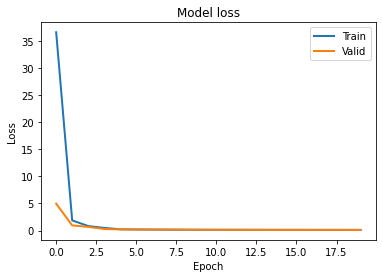

In [ ]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Valid')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

**# Test the autoencoder model on test dataset**

In [ ]:
test_x_predictions = autoencoder.predict(test_data2)
t=test_data2.values
mse = np.mean(np.power(t - test_x_predictions, 2), axis=1)  
error_df_test = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df2_test['anomaly']})
error_df_test = error_df_test.reset_index()

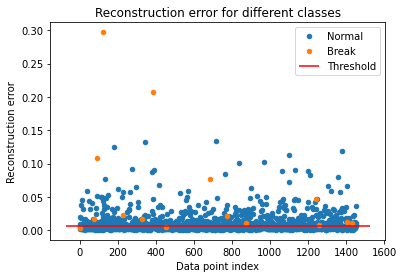

In [ ]:
threshold_fixed = 0.006
groups = error_df_test.groupby('True_class')

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=4.5, linestyle='',
            label= "Break" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

**# Confusion matrix**

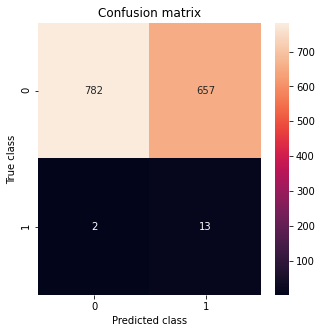

In [ ]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df_test.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df_test.True_class, pred_y)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()